# Google ASL Recognition Project Implementation Report

**Author:** JAGANOV Timur / m5281502

**Date:** July 2025

---

## Introduction

This project implements a deep learning model for American Sign Language (ASL) recognition using Google's ASL dataset. 
The implementation focuses on temporal sequence modeling with a hybrid architecture combining Temporal Convolutional Networks (TCN), LSTM, and Transformer components.

American Sign Language (ASL) is the primary language of the deaf community in North America, with over 500,000 native users.
Automatic ASL recognition presents unique challenges due to the complex spatio-temporal nature of sign gestures, requiring both precise hand shape recognition and temporal motion understanding.

This work addresses ASL recognition using the Google ASL dataset from Kaggle competition, which provides pre-computed MediaPipe landmarks (50GB of parquet files) instead of raw video data. We focus on developing a robust recognition system that overcomes the common challenge of overfitting in deep learning models.
Our approach combines multiple temporal modeling techniques with novel adaptive regularization strategies, processing the ready-to-use landmark sequences.

**GitHub Repository:** [https://github.com/jaganov/google_asl_recognition](https://github.com/jaganov/google_asl_recognition)

The overall approach involves:
1. **Data Processing**: Loading and preprocessing ASL sign data from Google's parquet files containing MediaPipe landmarks
2. **Feature Engineering**: Processing pre-computed MediaPipe landmarks (543 points per frame) into rich temporal features
3. **Model Training**: Developing and training deep learning models for sign classification
4. **Real-time Recognition**: Implementing a live recognition system that uses MediaPipe for webcam input
5. **Performance Optimization**: Optimizing the system for GPU acceleration (RTX 4070)

The project aims to bridge communication gaps for the deaf and hard-of-hearing community by providing an accessible, accurate, and real-time ASL recognition tool.


### Project Structure

The project consists of several key scripts:
- **Data Preparation**: `step1_extract_words.py`, `step1.2_split_train_test.py`, `step2_prepare_dataset.py`
- **Model Training**: `step3_prepare_train.py` 
- **Live Recognition**: `step5_live_recognition.py`
- **Testing & Utilities**: Various testing and analysis scripts

### Key Features

- **Advanced Preprocessing**: Multi-feature extraction including velocity, acceleration, and temporal consistency
- **Hybrid Architecture**: TCN + LSTM + Transformer for comprehensive temporal modeling
- **Adaptive Regularization**: Dynamic dropout and advanced augmentation strategies
- **Live Recognition**: Real-time webcam testing capabilities
- **Comprehensive Monitoring**: Detailed training metrics and model versioning

### Recognized Gestures (25 ASL Signs)

**Greetings & Courtesy**: hello, please, thankyou, bye  
**Family**: mom, dad, boy, girl, man, child  
**Actions**: drink, sleep, go  
**Emotions**: happy, sad, hungry, thirsty, sick, bad  
**Colors**: red, blue, green, yellow, black, white  

## Problem Statement

### Problem Definition

**Objective**: Develop an automated system for recognizing American Sign Language (ASL) signs from video input with high accuracy and real-time performance.

The primary challenges in ASL recognition include:
- **Temporal Dependencies**: Signs involve complex temporal patterns that simple CNNs cannot capture
- **Overfitting**: Limited training data leads to models memorizing rather than generalizing
- **Hardware Constraints**: Training large models on consumer GPUs requires careful optimization
- **Class Imbalance**: Some signs have fewer examples than others

### Dataset

- **Primary Dataset**: Google ASL Signs Dataset
- **Data Structure**: Pre-computed MediaPipe landmarks stored in parquet files (543 landmarks per frame)
- **Sign Categories**: 250 distinct ASL signs (we focus on 25 most common signs)
- **Data Split**: Training/Testing split for model validation
- **Data Size**: ~50GB of landmark data (no video processing required)


**Hardware Requirements:**
- **GPU**: NVIDIA RTX 4070 (12GB VRAM)
- **CPU**: Multi-core processor (Intel i5+ or AMD Ryzen 5+)
- **RAM**: 16GB system memory
- **Storage**: 50GB available space for datasets and models

**Software Environment:**
- **OS**: Windows 10/11, Linux Ubuntu 18.04+
- **Python**: 3.8+ with virtual environment support
- **CUDA**: 11.8+ for GPU acceleration
- **Key Libraries**: PyTorch, MediaPipe (for live recognition), OpenCV, NumPy, Pandas


**Google ASL Signs Dataset:**
- **Total Samples**: 25,000+ sign instances
- **Participants**: 100+ diverse signers
- **Sign Categories**: 250 ASL words (project focuses on 25 common signs)
- **Data Format**: Parquet files with pre-computed MediaPipe landmarks
  - Face: 468 points, Pose: 33 points, Hands: 42 points (21 per hand)
- **Temporal Structure**: Variable-length sequences with frame-level coordinates


### Expected Results

**Primary Performance Targets:**
- **Validation Accuracy**: 75-78% (significant improvement over baseline 65%)
- **Inference Time**: <100ms per sequence (real-time capability)
- **Training Stability**: Smooth convergence without sharp accuracy drops
- **Overfitting Reduction**: Training-validation gap <12% (vs baseline 17.4%)
- **Model Size**: <15MB for deployment efficiency

**Technical Improvements:**
- **Temporal Modeling**: Enhanced capture of sign dynamics through hybrid architecture
- **Generalization**: Better performance across different signers and conditions
- **Convergence**: More stable training reaching 100-150 epochs vs baseline 55
- **Memory Efficiency**: Optimized for RTX 4070 (12GB VRAM) with batch size 32

**Real-world Performance:**
- **Live Recognition**: Smooth real-time processing via webcam
- **Robustness**: Consistent performance across lighting conditions
- **Scalability**: Architecture supports easy extension to more sign classes

### Evaluation Criteria

**Classification Metrics:**
- **Training Accuracy**: Accuracy on training dataset during training process
- **Validation Accuracy**: Primary metric for model comparison and early stopping
- **Loss Values**: Training and validation loss for convergence analysis
- **Best Model Selection**: Highest validation accuracy achieved during training

**Training Metrics:**
- **Loss Convergence**: Training and validation loss curves
- **Learning Stability**: Absence of sharp accuracy drops or oscillations
- **Overfitting Analysis**: Gap between training and validation performance
- **Epoch Efficiency**: Number of epochs to reach optimal performance


## Visual Results

### Training Progress
![Training History](./training_history.png)

### Live Recognition Demo
![Live Recognition Screenshot](./happy_20250721_134139_002.jpg)


## Technical Approach and Models

### Overview

The ASL recognition model employs a sophisticated hybrid architecture that combines multiple deep learning techniques to effectively capture temporal dependencies in sign language sequences:

**Architecture Pipeline:**
```
Input (MediaPipe landmarks) → Preprocessing → TCN → LSTM → Attention → CNN+Transformer → Pooling → Classification
```

### Core Components

#### 1. Advanced Preprocessing Layer
- **Input**: MediaPipe hand and face landmarks (543 points total)
- **Landmark Selection**: Focus on key landmarks (hands, eyes, nose, lips) - 62 selected points
- **Feature Engineering**:
  - **Velocity**: Frame-to-frame motion (dx)
  - **Acceleration**: Second-order motion (dx2) 
  - **Relative Motion**: Inter-landmark movement patterns
  - **Temporal Consistency**: Motion coherence across frames
  - **Motion Magnitude**: Movement intensity
  - **Motion Direction**: Movement orientation
- **Normalization**: Relative to nose position for translation invariance
- **Output**: 434 features per frame (62 landmarks × 7 feature types)

#### 2. Temporal Convolutional Network (TCN)
- **3 Sequential Blocks** with increasing dilation rates (1, 2, 4)
- **Kernel Size**: 17 for extended temporal receptive field
- **Causal Convolutions**: Maintain temporal order
- **Gated Activation**: Sigmoid gates control information flow
- **Purpose**: Capture local temporal patterns at different scales

#### 3. Bidirectional LSTM
- **2 Layers** for deep temporal modeling
- **Bidirectional**: Processes sequences forward and backward
- **Hidden Dimension**: 96 (dim/2) per direction
- **Purpose**: Capture long-term dependencies in both directions

#### 4. Temporal Attention
- **8 Attention Heads** for multi-aspect focus
- **Positional Encoding**: Learned temporal positions up to 1000 frames
- **Self-Attention**: Focuses on important time steps
- **Purpose**: Highlight critical frames for classification

#### 5. CNN + Transformer Blocks
- **3 Conv1D Blocks**: Depthwise separable convolutions
- **1 Transformer Block**: Multi-head self-attention + FFN
- **Activation**: Swish (SiLU) for smooth gradients
- **Purpose**: Refine feature representations

#### 6. Multi-Scale Pooling
- **Global Average Pooling**: Overall sequence representation
- **Global Max Pooling**: Peak activation capture  
- **Attention Pooling**: Learned importance weighting
- **Concatenation**: Combines all pooling results (3×dim features)

#### 7. Classification Head
- **Input**: 576 features (192×3 from pooling)
- **Hidden Layer**: 192 units with BatchNorm + SiLU + Dropout(0.3)
- **Output**: 250 classes (ASL signs)

### Regularization Strategy

#### Adaptive Dropout
- **Dynamic Rates**: Gradually increases from 0.1 to 0.6 over training
- **Warmup Period**: 20-30 epochs for smooth adaptation
- **Purpose**: Prevents overfitting while maintaining learning capacity

#### Data Augmentation
- **Temporal Resampling**: Scale sequences (0.8-1.2x)
- **Random Masking**: Hide 5% of frames
- **Spatial Affine**: Small rotations, translations, scaling
- **Temporal Distortion**: Add temporal noise

### Technical Specifications

- **Total Parameters**: ~2.1M (optimized for RTX 4070)
- **Input Sequence Length**: Up to 384 frames
- **Feature Dimension**: 192 throughout the network
- **Batch Size**: 32 (memory optimized)
- **Training Strategy**: AdamW + CosineAnnealingWarmRestarts
- **Early Stopping**: Patience of 20 epochs after minimum 80 epochs


## Experiments & Results

This section contains the complete implementation of our ASL recognition model training pipeline. The code is structured as modular components that can be executed step-by-step in a Jupyter notebook environment.

### Setup and Imports


In [1]:
# Первая ячейка - ОБЯЗАТЕЛЬНО выполните первой!
import sys
import warnings
import os

# Очистка pandas из памяти kernel'а
pandas_modules = [mod for mod in sys.modules.keys() if 'pandas' in mod]
for mod in pandas_modules:
    if mod in sys.modules:
        del sys.modules[mod]

# Очистка pyarrow
pyarrow_modules = [mod for mod in sys.modules.keys() if 'pyarrow' in mod]
for mod in pyarrow_modules:
    if mod in sys.modules:
        del sys.modules[mod]

print("Память kernel'а очищена")

Память kernel'а очищена


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import random
import math
import time
import json

import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

from step2_prepare_dataset import load_dataset

TEST_MODE = False

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

dtype = torch.float
dtype_long = torch.long
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f"🚀 Using device: {device}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")


Using device: cuda:0
🚀 Using device: cuda:0
   GPU: NVIDIA GeForce RTX 4070
   GPU Memory: 12.0 GB


### Adaptive Dropout Implementation

**Purpose**: Traditional fixed dropout can be too aggressive early in training and insufficient later. AdaptiveDropout gradually increases dropout rate during training, allowing the model to learn basic patterns first, then applying stronger regularization to prevent overfitting.

**Key Features**:
- Starts with low dropout (0.1) for initial learning
- Gradually increases to high dropout (0.6) over warmup epochs
- Prevents overfitting while maintaining learning capacity


In [3]:
class AdaptiveDropout(nn.Module):
    """
    Adaptive dropout that gradually increases
    """
    def __init__(self, initial_p=0.1, final_p=0.6, warmup_epochs=30):
        super().__init__()
        self.initial_p = initial_p
        self.final_p = final_p
        self.warmup_epochs = warmup_epochs
        self.current_epoch = 0
    
    def forward(self, x):
        if self.training:
            # Gradual dropout increase
            if self.current_epoch < self.warmup_epochs:
                p = self.initial_p + (self.final_p - self.initial_p) * (self.current_epoch / self.warmup_epochs)
            else:
                p = self.final_p
            return F.dropout(x, p=p, training=True)
        return x
    
    def step(self):
        self.current_epoch += 1

# Test the adaptive dropout behavior
adaptive_dropout = AdaptiveDropout()
print("Dropout rates over epochs:")
for epoch in range(35):
    if epoch < 30:
        p = 0.1 + (0.6 - 0.1) * (epoch / 30)
    else:
        p = 0.6
    if epoch % 5 == 0 or epoch >= 28:
        print(f"Epoch {epoch}: {p:.3f}")
    adaptive_dropout.step()


Dropout rates over epochs:
Epoch 0: 0.100
Epoch 5: 0.183
Epoch 10: 0.267
Epoch 15: 0.350
Epoch 20: 0.433
Epoch 25: 0.517
Epoch 28: 0.567
Epoch 29: 0.583
Epoch 30: 0.600
Epoch 31: 0.600
Epoch 32: 0.600
Epoch 33: 0.600
Epoch 34: 0.600


## Data Preprocessing and Augmentation Pipeline

Advanced preprocessing layer that extracts motion features from ASL landmark sequences and applies temporal-aware data augmentation techniques. The preprocessing layer computes velocity, acceleration, relative motion, temporal consistency, motion magnitude and direction features from 62 key facial and hand landmarks. The augmentation class implements temporal resampling, masking, affine transformations, and temporal distortion while preserving gesture semantics.

In [4]:
class PreprocessingLayer(nn.Module):
    """
    Enhanced preprocessing layer with explicit temporal dependency modeling
    """
    def __init__(self, max_len=384, point_landmarks=None):
        super().__init__()
        self.max_len = max_len
        
        # Select key landmarks: hands, eyes, nose, lips
        if point_landmarks is None:
            # Face landmarks (eyes, nose, lips)
            face_landmarks = [33, 133, 362, 263, 61, 291, 199, 419, 17, 84, 17, 314, 405, 320, 307, 375, 321, 308, 324, 318]
            # Hand landmarks (key hand points)
            left_hand = [501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521]
            right_hand = [522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542]
            self.point_landmarks = face_landmarks + left_hand + right_hand
        else:
            self.point_landmarks = point_landmarks
    
    def compute_motion_features(self, x):
        """
        Compute extended motion features considering neighboring frames
        """
        # x: (batch, seq, landmarks, 2)
        batch_size, seq_len, num_landmarks, _ = x.shape
        
        # Basic motion features (lag1, lag2)
        dx = torch.zeros_like(x)
        dx2 = torch.zeros_like(x)
        
        if seq_len > 1:
            dx[:, :-1] = x[:, 1:] - x[:, :-1]  # velocity
        
        if seq_len > 2:
            dx2[:, :-2] = x[:, 2:] - x[:, :-2]  # acceleration
        
        # Extended motion features
        # 1. Relative motion (relative movement between landmarks)
        relative_motion = torch.zeros_like(x)
        if seq_len > 1:
            # Compute relative motion between adjacent landmarks
            for i in range(num_landmarks - 1):
                relative_motion[:, :-1, i] = x[:, 1:, i] - x[:, :-1, i+1]
        
        # 2. Temporal consistency (temporal consistency)
        temporal_consistency = torch.zeros_like(x)
        if seq_len > 3:
            # Check motion consistency over 3 frames
            for t in range(seq_len - 2):
                motion1 = x[:, t+1] - x[:, t]
                motion2 = x[:, t+2] - x[:, t+1]
                # Cosine similarity between motions
                cos_sim = F.cosine_similarity(motion1, motion2, dim=-1, eps=1e-8)
                temporal_consistency[:, t] = cos_sim.unsqueeze(-1).expand(-1, -1, 2)
        
        # 3. Motion magnitude (motion magnitude)
        motion_magnitude = torch.norm(dx, dim=-1, keepdim=True)
        
        # 4. Motion direction (motion direction)
        motion_direction = torch.atan2(dx[..., 1], dx[..., 0]).unsqueeze(-1)
        
        return dx, dx2, relative_motion, temporal_consistency, motion_magnitude, motion_direction
    
    def forward(self, x):
        """
        x: (batch_size, seq_len, num_landmarks, 3)
        """
        if x.dim() == 3:
            x = x.unsqueeze(0)  # (1, seq_len, num_landmarks, 3)
        
        # Normalization relative to nose (landmark 17)
        nose_coords = x[:, :, 17:18, :2]  # (batch, seq, 1, 2)
        # Replace NaN with 0.5 for mean calculation
        nose_coords_clean = torch.where(torch.isnan(nose_coords), torch.tensor(0.5, device=x.device, dtype=x.dtype), nose_coords)
        mean = torch.mean(nose_coords_clean, dim=[1, 2], keepdim=True)  # (batch, 1, 1, 2)
        
        # Select required landmarks
        x = x[:, :, self.point_landmarks, :]  # (batch, seq, num_selected, 3)
        
        # Standardization - expand mean to x dimensions
        mean_expanded = mean.expand(-1, x.shape[1], x.shape[2], -1)  # (batch, seq, num_selected, 2)
        
        # Replace NaN with 0 for std calculation
        x_clean = torch.where(torch.isnan(x), torch.tensor(0.0, device=x.device, dtype=x.dtype), x)
        std = torch.std(x_clean, dim=[1, 2], keepdim=True)  # (batch, 1, 1, 3)
        std_expanded = std.expand(-1, x.shape[1], x.shape[2], -1)  # (batch, seq, num_selected, 3)
        
        # Normalize only x, y coordinates (first 2 dimensions)
        x_normalized = x.clone()
        x_normalized[..., :2] = (x[..., :2] - mean_expanded) / (std_expanded[..., :2] + 1e-8)
        x = x_normalized
        
        # Truncate to max_len
        if self.max_len is not None:
            x = x[:, :self.max_len]
        
        length = x.shape[1]
        x = x[..., :2]  # Take only x, y coordinates
        
        # Compute extended motion features
        dx, dx2, relative_motion, temporal_consistency, motion_magnitude, motion_direction = self.compute_motion_features(x)
        
        # Combine all features
        x_flat = x.reshape(x.shape[0], length, -1)  # (batch, seq, num_landmarks*2)
        dx_flat = dx.reshape(x.shape[0], length, -1)
        dx2_flat = dx2.reshape(x.shape[0], length, -1)
        relative_motion_flat = relative_motion.reshape(x.shape[0], length, -1)
        temporal_consistency_flat = temporal_consistency.reshape(x.shape[0], length, -1)
        motion_magnitude_flat = motion_magnitude.reshape(x.shape[0], length, -1)
        motion_direction_flat = motion_direction.reshape(x.shape[0], length, -1)
        
        x_combined = torch.cat([
            x_flat, dx_flat, dx2_flat, relative_motion_flat, 
            temporal_consistency_flat, motion_magnitude_flat, motion_direction_flat
        ], dim=-1)
        
        # Replace NaN with 0
        x_combined = torch.where(torch.isnan(x_combined), torch.tensor(0.0, device=x.device, dtype=x.dtype), x_combined)
        
        return x_combined

class Augmentation:
    """
    Simplified data augmentation with preservation of temporal dependencies
    """
    def __init__(self, p=0.5):  # Increase augmentation probability to combat overfitting
        self.p = p
    
    def temporal_resample(self, x, target_length=None):
        """Simplified temporal resampling"""
        if random.random() > self.p:
            return x
        
        if target_length is None:
            scale = random.uniform(0.8, 1.2)  # More conservative range
            target_length = int(x.shape[0] * scale)
        
        if target_length <= 0:
            return x
        
        # Simple interpolation
        indices = torch.linspace(0, x.shape[0] - 1, target_length)
        indices = indices.long().clamp(0, x.shape[0] - 1)
        return x[indices]
    
    def random_masking(self, x, mask_ratio=0.05):  # Increase masking to combat overfitting
        """Simplified masking"""
        if random.random() > self.p:
            return x
        
        seq_len = x.shape[0]
        num_masks = int(seq_len * mask_ratio)
        
        if num_masks > 0:
            mask_indices = random.sample(range(seq_len), num_masks)
            x[mask_indices] = 0
        
        return x
    
    def random_affine(self, x, max_scale=0.02, max_shift=0.01, max_rotate=2):  # Reduce parameters
        """Simplified affine transformations"""
        if random.random() > self.p:
            return x
        
        scale = 1 + random.uniform(-max_scale, max_scale)
        shift_x = random.uniform(-max_shift, max_shift)
        shift_y = random.uniform(-max_shift, max_shift)
        angle = random.uniform(-max_rotate, max_rotate) * math.pi / 180
        
        x_transformed = x.clone()
        x_transformed[..., 0::2] = x_transformed[..., 0::2] * scale + shift_x
        x_transformed[..., 1::2] = x_transformed[..., 1::2] * scale + shift_y
        
        return x_transformed
    
    def apply_augmentations(self, x):
        """Apply enhanced augmentations with adaptive probability"""
        # Adaptive augmentation probability
        if random.random() < 0.6:  # Increase base probability
            x = self.temporal_resample(x)
        if random.random() < 0.5:
            x = self.random_affine(x)
        if random.random() < 0.4:
            x = self.random_masking(x)
        
        # Add new augmentation type - temporal distortion
        if random.random() < 0.3:
            x = self.temporal_distortion(x)
        
        return x
    
    def temporal_distortion(self, x, max_shift=0.1):
        """Temporal distortion for better generalization"""
        if random.random() > self.p:
            return x
        
        seq_len = x.shape[0]
        # Create random shifts for each frame
        shifts = torch.randn(seq_len) * max_shift
        shifts = torch.cumsum(shifts, dim=0)
        
        # Apply shifts to coordinates
        x_distorted = x.clone()
        x_distorted[..., 0::2] += shifts.unsqueeze(-1).unsqueeze(-1)  # x coordinates
        x_distorted[..., 1::2] += shifts.unsqueeze(-1).unsqueeze(-1)  # y coordinates
        
        return x_distorted


## Temporal Convolutional Network Block

Temporal convolutional block with dilated causal convolutions for processing sequential landmark data. The block uses gated activation mechanism combining main and gate branches, applies depthwise separable convolutions for efficiency, and maintains causal relationships through proper padding. Includes residual connections, batch normalization, and dropout for stable training while extending receptive field through configurable dilation rates.

In [5]:
class TemporalConvBlock(nn.Module):
    """
    Temporal Convolutional Network block with extended receptive field
    """
    def __init__(self, dim, kernel_size=17, dilation=1, drop_rate=0.2):
        super().__init__()
        self.kernel_size = kernel_size
        self.dilation = dilation
        self.padding = (kernel_size - 1) * dilation
        
        # Causal convolution with dilation
        self.conv1 = nn.Conv1d(dim, dim, kernel_size, padding=self.padding, 
                              dilation=dilation, groups=dim)
        self.conv2 = nn.Conv1d(dim, dim, 1)  # Pointwise
        
        # Gated activation
        self.gate_conv = nn.Conv1d(dim, dim, kernel_size, padding=self.padding, 
                                  dilation=dilation, groups=dim)
        self.gate_conv2 = nn.Conv1d(dim, dim, 1)
        
        # Normalization
        self.bn = nn.BatchNorm1d(dim, momentum=0.95)
        self.dropout = nn.Dropout(drop_rate)
        
        # Residual connection
        self.residual = nn.Conv1d(dim, dim, 1) if dim != dim else nn.Identity()
    
    def forward(self, x):
        # x: (batch, seq, dim)
        residual = self.residual(x.transpose(1, 2))
        
        # Causal convolution
        x = x.transpose(1, 2)  # (batch, dim, seq)
        
        # Main branch
        conv_out = self.conv1(x)
        conv_out = self.conv2(conv_out)
        
        # Gate branch
        gate_out = self.gate_conv(x)
        gate_out = self.gate_conv2(gate_out)
        gate_out = torch.sigmoid(gate_out)
        
        # Gated activation
        x = conv_out * gate_out
        
        # Apply causal padding (trim from right)
        x = x[:, :, :-self.padding] if self.padding > 0 else x
        
        # Ensure sequence dimension hasn't changed
        if x.shape[-1] != residual.shape[-1]:
            # If dimension changed, trim or pad
            target_len = residual.shape[-1]
            if x.shape[-1] > target_len:
                x = x[:, :, :target_len]
            else:
                # Pad with zeros on the right
                padding = torch.zeros(x.shape[0], x.shape[1], target_len - x.shape[2], 
                                    device=x.device, dtype=x.dtype)
                x = torch.cat([x, padding], dim=2)
        
        x = self.bn(x)
        x = self.dropout(x)
        
        x = x.transpose(1, 2)  # (batch, seq, dim)
        x = x + residual.transpose(1, 2)
        
        return x


## Bidirectional LSTM Module

Bidirectional LSTM network for capturing long-term temporal dependencies in both forward and backward directions. The module processes sequential landmark data with configurable hidden dimensions and multiple layers, concatenates bidirectional outputs, and projects back to original feature dimension through a linear layer. Includes dropout regularization and batch-first processing for efficient training on gesture sequences.

In [6]:
class BidirectionalLSTM(nn.Module):
    """
    Bidirectional LSTM for capturing long-term temporal dependencies
    """
    def __init__(self, dim, hidden_dim=None, num_layers=2, drop_rate=0.2):
        super().__init__()
        if hidden_dim is None:
            hidden_dim = dim
        
        self.lstm = nn.LSTM(
            input_size=dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            bidirectional=True,
            batch_first=True,
            dropout=drop_rate if num_layers > 1 else 0
        )
        
        # Projection back to original dimension
        self.projection = nn.Linear(hidden_dim * 2, dim)
        self.dropout = nn.Dropout(drop_rate)
    
    def forward(self, x):
        # x: (batch, seq, dim)
        lstm_out, _ = self.lstm(x)
        x = self.projection(lstm_out)
        x = self.dropout(x)
        return x

## 1D Convolutional Block with Causal Padding

Depthwise separable 1D convolutional block designed for causal temporal modeling in ASL sequences. The module combines depthwise and pointwise convolutions with causal padding to preserve temporal order, uses SiLU activation and batch normalization for stable training, and includes residual connections for gradient flow. Features configurable kernel size and dropout regularization while maintaining sequence length consistency through careful padding management.

In [7]:
class Conv1DBlock(nn.Module):
    """
    1D CNN block with depthwise convolution and causal padding
    """
    def __init__(self, dim, kernel_size=17, drop_rate=0.2):
        super().__init__()
        self.kernel_size = kernel_size
        self.padding = kernel_size - 1  # Causal padding
        
        # Depthwise convolution
        self.depthwise = nn.Conv1d(dim, dim, kernel_size, padding=self.padding, groups=dim)
        self.pointwise = nn.Conv1d(dim, dim, 1)
        
        # BatchNorm + Swish (as in winner solution)
        self.bn = nn.BatchNorm1d(dim, momentum=0.95)
        self.dropout = nn.Dropout(drop_rate)
        
        # Residual connection
        self.residual = nn.Conv1d(dim, dim, 1) if dim != dim else nn.Identity()
    
    def forward(self, x):
        # x: (batch, seq, dim)
        residual = self.residual(x.transpose(1, 2))
        
        # Causal convolution
        x = x.transpose(1, 2)  # (batch, dim, seq)
        x = self.depthwise(x)
        x = self.pointwise(x)
        
        # Apply causal padding (trim from right)
        x = x[:, :, :-self.padding] if self.padding > 0 else x
        
        # Ensure sequence dimension hasn't changed
        if x.shape[-1] != residual.shape[-1]:
            # If dimension changed, trim or pad
            target_len = residual.shape[-1]
            if x.shape[-1] > target_len:
                x = x[:, :, :target_len]
            else:
                # Pad with zeros on the right
                padding = torch.zeros(x.shape[0], x.shape[1], target_len - x.shape[2], 
                                    device=x.device, dtype=x.dtype)
                x = torch.cat([x, padding], dim=2)
        
        x = self.bn(x)
        x = F.silu(x)  # Swish activation
        x = self.dropout(x)
        
        x = x.transpose(1, 2)  # (batch, seq, dim)
        x = x + residual.transpose(1, 2)
        
        return x


## Transformer Block with BatchNorm and SiLU Activation

Standard transformer block featuring multi-head self-attention and feed-forward network with architectural optimizations for ASL recognition. Uses BatchNorm instead of LayerNorm for improved training stability on sequential data, applies SiLU activation functions throughout the network, and includes configurable expansion ratios in the feed-forward layers. Features residual connections and dropout regularization for robust sequence-to-sequence modeling.

In [8]:
class TransformerBlock(nn.Module):
    """
    Transformer block with BatchNorm + Swish
    """
    def __init__(self, dim, num_heads=8, expand=2, drop_rate=0.2):
        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        
        # Multi-head attention
        self.attention = nn.MultiheadAttention(dim, num_heads, batch_first=True, dropout=drop_rate)
        self.attention_norm = nn.BatchNorm1d(dim, momentum=0.95)
        
        # Feed-forward network
        self.ffn = nn.Sequential(
            nn.Linear(dim, dim * expand),
            nn.SiLU(),  # Swish
            nn.Dropout(drop_rate),
            nn.Linear(dim * expand, dim),
            nn.Dropout(drop_rate)
        )
        self.ffn_norm = nn.BatchNorm1d(dim, momentum=0.95)
    
    def forward(self, x):
        # x: (batch, seq, dim)
        residual = x
        
        # Self-attention
        x_attn, _ = self.attention(x, x, x)
        x = x + x_attn
        x = self.attention_norm(x.transpose(1, 2)).transpose(1, 2)
        
        # Feed-forward
        x_ffn = self.ffn(x)
        x = x + x_ffn
        x = self.ffn_norm(x.transpose(1, 2)).transpose(1, 2)
        
        return x

## Temporal Attention Module

Multi-head attention mechanism for identifying and focusing on the most important frames within ASL gesture sequences. The module incorporates learnable temporal position encodings for sequences up to 1000 frames, applies scaled dot-product attention across the temporal dimension, and uses multiple attention heads to capture different types of temporal relationships. Features output projection and dropout regularization for robust sequence modeling.

In [9]:
class TemporalAttention(nn.Module):
    """
    Temporal Attention for focusing on important frames
    """
    def __init__(self, dim, num_heads=8, drop_rate=0.2):
        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        
        # Temporal attention
        self.temporal_q = nn.Linear(dim, dim)
        self.temporal_k = nn.Linear(dim, dim)
        self.temporal_v = nn.Linear(dim, dim)
        
        # Output projection
        self.output_proj = nn.Linear(dim, dim)
        self.dropout = nn.Dropout(drop_rate)
        
        # Temporal position encoding
        self.temporal_pos_enc = nn.Parameter(torch.randn(1, 1000, dim))  # Max sequence length
    
    def forward(self, x):
        # x: (batch, seq, dim)
        batch_size, seq_len, _ = x.shape
        
        # Add temporal position encoding
        if seq_len <= self.temporal_pos_enc.shape[1]:
            pos_enc = self.temporal_pos_enc[:, :seq_len]
            x = x + pos_enc
        
        # Temporal attention
        q = self.temporal_q(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        k = self.temporal_k(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.temporal_v(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn_weights = F.softmax(scores, dim=-1)
        attn_weights = self.dropout(attn_weights)
        
        # Apply attention
        attn_output = torch.matmul(attn_weights, v)
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, seq_len, self.dim)
        
        # Output projection
        x = self.output_proj(attn_output)
        x = self.dropout(x)
        
        return x


## Enhanced ASL Recognition Model

Comprehensive ASL recognition architecture combining temporal convolutional networks, bidirectional LSTM, multi-head attention, and transformer blocks for robust gesture classification. The model processes landmark sequences through preprocessing, applies temporal convolutions with increasing dilation rates, captures long-term dependencies via bidirectional LSTM, focuses on important frames using temporal attention, and combines multiple pooling strategies including adaptive average, max, and attention pooling. Features adaptive dropout regularization, proper weight initialization, and a multi-layer classifier for 250 ASL word classification.

In [10]:
class ASLModel(nn.Module):
    """
    Enhanced model with adaptive regularization and improved architecture
    """
    def __init__(self, input_dim, num_classes, max_len=384, dim=192, dropout_step=0):
        super().__init__()
        self.max_len = max_len
        self.dim = dim
        
        # Preprocessing
        self.preprocessing = PreprocessingLayer(max_len)
        
        # Stem with improved initialization
        self.stem_conv = nn.Linear(input_dim, dim, bias=False)
        self.stem_bn = nn.BatchNorm1d(dim, momentum=0.95)
        self.stem_dropout = AdaptiveDropout(initial_p=0.1, final_p=0.3, warmup_epochs=20)
        
        # Temporal Convolutional Network (TCN) - 3 blocks with different dilations
        self.tcn1 = TemporalConvBlock(dim, kernel_size=17, dilation=1, drop_rate=0.15)
        self.tcn2 = TemporalConvBlock(dim, kernel_size=17, dilation=2, drop_rate=0.2)
        self.tcn3 = TemporalConvBlock(dim, kernel_size=17, dilation=4, drop_rate=0.25)
        
        # Projection for attention pooling (in case of dimension change)
        self.attention_projection = nn.Linear(dim, dim)
        
        # Bidirectional LSTM - 2 layers for better dependency capture
        self.lstm = BidirectionalLSTM(dim, hidden_dim=dim//2, num_layers=2, drop_rate=0.15)
        
        # Temporal Attention - more heads for better attention
        self.temporal_attention = TemporalAttention(dim, num_heads=8, drop_rate=0.15)
        
        # 1D CNN + Transformer blocks - add another conv block
        ksize = 17
        
        self.conv1 = Conv1DBlock(dim, ksize, drop_rate=0.15)
        self.conv2 = Conv1DBlock(dim, ksize, drop_rate=0.2)
        self.conv3 = Conv1DBlock(dim, ksize, drop_rate=0.25)
        self.transformer1 = TransformerBlock(dim, expand=2, drop_rate=0.15)
        
        # Top layers with improved pooling
        self.top_conv = nn.Linear(dim, dim)
        self.top_bn = nn.BatchNorm1d(dim, momentum=0.95)
        self.adaptive_dropout = AdaptiveDropout(initial_p=0.2, final_p=0.5, warmup_epochs=25)
        
        # Improved pooling - add attention pooling
        self.temporal_pool1 = nn.AdaptiveAvgPool1d(1)
        self.temporal_pool2 = nn.AdaptiveMaxPool1d(1)
        self.attention_pool = nn.MultiheadAttention(dim, num_heads=4, batch_first=True, dropout=0.1)
        
        # Final classifier with improved architecture
        self.classifier = nn.Sequential(
            nn.Linear(dim * 3, dim),  # dim*3 for avg + max + attention pooling
            nn.BatchNorm1d(dim),
            nn.SiLU(),
            nn.Dropout(0.3),
            nn.Linear(dim, num_classes)
        )
        
        # Weight initialization
        self._init_weights()
    
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.zeros_(m.bias)
            elif isinstance(m, nn.Conv1d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm1d):
                init.ones_(m.weight)
                init.zeros_(m.bias)
            elif isinstance(m, nn.LSTM):
                for name, param in m.named_parameters():
                    if 'weight' in name:
                        init.orthogonal_(param)
                    elif 'bias' in name:
                        init.zeros_(param)
    
    def forward(self, x):
        # x: (batch, seq, landmarks, 3)
        
        # Preprocessing
        x = self.preprocessing(x)  # (batch, seq, features)
        
        # Stem with adaptive dropout
        x = self.stem_conv(x)
        x = self.stem_bn(x.transpose(1, 2)).transpose(1, 2)
        x = self.stem_dropout(x)
        
        # TCN blocks - 3 blocks with different dilations
        x = self.tcn1(x)
        x = self.tcn2(x)
        x = self.tcn3(x)
        
        # Bidirectional LSTM - 2 layers
        x = self.lstm(x)
        
        # Temporal Attention - more heads
        x = self.temporal_attention(x)
        
        # 1D CNN + Transformer - add third conv block
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.transformer1(x)
        
        # Top layers with improved pooling
        x = self.top_conv(x)  # (batch, seq, dim)
        x = self.top_bn(x.transpose(1, 2)).transpose(1, 2)
        x = self.adaptive_dropout(x)
        
        # Improved temporal pooling
        x_transposed = x.transpose(1, 2)  # (batch, dim, seq)
        
        # Global average pooling
        global_avg = self.temporal_pool1(x_transposed).squeeze(-1)  # (batch, dim)
        
        # Global max pooling
        global_max = self.temporal_pool2(x_transposed).squeeze(-1)  # (batch, dim)
        
        # Attention pooling - use projection for stability
        x_for_attn = self.attention_projection(x)  # x already has dimension (batch, seq, dim)
        
        attn_out, _ = self.attention_pool(x_for_attn, x_for_attn, x_for_attn)
        global_attn = torch.mean(attn_out, dim=1)  # (batch, dim)
        
        # Combine pooling results
        x_pooled = torch.cat([global_avg, global_max, global_attn], dim=1)  # (batch, dim*3)
        
        x = self.classifier(x_pooled)
        
        return x


## Cosine Annealing Warm Restarts Scheduler

Custom learning rate scheduler implementing cosine annealing with periodic warm restarts for improved training dynamics. The scheduler reduces learning rate following a cosine curve within each restart period, then jumps back to the initial rate to escape local minima. Features configurable restart period multiplication and minimum learning rate bounds, enabling the model to explore different regions of the loss landscape and potentially achieve better convergence in ASL recognition training.

In [11]:
# ============================================================================
# ENHANCED TRAINING STRATEGY
# ============================================================================


class CosineAnnealingWarmRestarts(torch.optim.lr_scheduler._LRScheduler):
    """
    Enhanced scheduler with warm restarts
    """
    def __init__(self, optimizer, T_0, T_mult=1, eta_min=0, last_epoch=-1):
        self.T_0 = T_0
        self.T_mult = T_mult
        self.eta_min = eta_min
        super().__init__(optimizer, last_epoch)
    
    def get_lr(self):
        if self.last_epoch == 0:
            return [group['lr'] for group in self.optimizer.param_groups]
        
        T_cur = self.last_epoch
        T_i = self.T_0
        
        # Find current period
        while T_cur >= T_i:
            T_cur -= T_i
            T_i *= self.T_mult
        
        return [self.eta_min + (base_lr - self.eta_min) * 
                (1 + math.cos(math.pi * T_cur / T_i)) / 2
                for base_lr in self.base_lrs]

## ASL Dataset and Batch Collation

PyTorch Dataset implementation for ASL gesture sequences with optional data augmentation and custom batch collation for variable-length sequences. The dataset applies temporal augmentations during training through the Augmentation class, while the collate function handles sequences of different lengths by padding shorter sequences with zeros to match the maximum sequence length in each batch, enabling efficient batch processing for the ASL recognition model.

In [12]:
# ============================================================================
# DATASET AND DATALOADER
# ============================================================================

class ASLDataset(Dataset):
    """
    Dataset for ASL gestures
    """
    def __init__(self, sequences, labels, augment=True):
        self.sequences = sequences
        self.labels = labels
        self.augment = augment
        self.augmentor = Augmentation(p=0.5) if augment else None
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        label = self.labels[idx]
        
        if self.augment and self.augmentor:
            # Apply augmentation
            sequence = self.augmentor.apply_augmentations(sequence)
        
        return sequence, label

def collate_fn(batch):
    """
    Collate function for batches of different lengths
    """
    sequences, labels = zip(*batch)
    
    # Find maximum length in batch
    max_len = max(seq.shape[0] for seq in sequences)
    
    # Padding to maximum length
    padded_sequences = []
    for seq in sequences:
        if seq.shape[0] < max_len:
            # Zero padding
            padding = torch.zeros((max_len - seq.shape[0], seq.shape[1], seq.shape[2]), 
                                dtype=seq.dtype, device=seq.device)
            seq = torch.cat([seq, padding], dim=0)
        padded_sequences.append(seq)
    
    # Stack into batch
    batch_sequences = torch.stack(padded_sequences)
    batch_labels = torch.tensor(labels, dtype=torch.long)
    
    return batch_sequences, batch_labels

## Training Pipeline with Advanced Optimization Strategies

Comprehensive training framework featuring epoch-based training and validation functions with adaptive dropout scheduling, gradient clipping, and progress tracking. The main training function implements enhanced optimization strategies including cosine annealing with warm restarts, learning rate warmup, early stopping with patience monitoring, automatic model checkpointing, and detailed experiment tracking through JSON manifests. Features label smoothing, weight decay regularization, and comprehensive training history visualization for robust ASL gesture recognition model development.

In [13]:
# ============================================================================
# TRAINING FUNCTIONS
# ============================================================================
def train_epoch(model, dataloader, criterion, optimizer, device, epoch):
    """
    Training one epoch with enhanced strategy
    """
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    # Update adaptive dropout layers
    for module in model.modules():
        if isinstance(module, AdaptiveDropout):
            module.step()
    
    total_batches = len(dataloader)
    print(f'Starting Epoch {epoch} with {total_batches} batches...')
    
    for batch_idx, (sequences, labels) in enumerate(dataloader):
        sequences = sequences.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        total_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print progress every 10% of batches or every 50 batches (whichever is smaller)
        print_interval = min(50, max(1, total_batches // 10))
        if (batch_idx + 1) % print_interval == 0 or (batch_idx + 1) == total_batches:
            accuracy = 100. * correct / total
            avg_loss = total_loss / (batch_idx + 1)
            progress = 100. * (batch_idx + 1) / total_batches
            print(f'  Batch {batch_idx + 1}/{total_batches} ({progress:.1f}%) - '
                  f'Loss: {avg_loss:.4f}, Acc: {accuracy:.2f}%')
    
    return total_loss / len(dataloader), 100. * correct / total

def validate_epoch(model, dataloader, criterion, device):
    """
    Validation of one epoch
    """
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    
    total_batches = len(dataloader)
    print('Starting validation...')
    
    with torch.no_grad():
        for batch_idx, (sequences, labels) in enumerate(dataloader):
            sequences = sequences.to(device)
            labels = labels.to(device)
            
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Print progress every 20% of batches
            print_interval = max(1, total_batches // 5)
            if (batch_idx + 1) % print_interval == 0 or (batch_idx + 1) == total_batches:
                progress = 100. * (batch_idx + 1) / total_batches
                print(f'  Validation progress: {progress:.1f}%')
    
    return total_loss / len(dataloader), 100. * correct / total

def train_model(train_data, train_labels, test_data, test_labels, num_classes, 
                epochs=400, batch_size=32, lr=5e-4, max_len=384, timestamp=None, model_prefix=None):
    """
    Main training function for simplified but effective ASL model
    """
    print(f"🎯 Starting training of simplified ASL model with focus on temporal dependencies")
    print(f"   Epochs: {epochs}")
    print(f"   Batch size: {batch_size}")
    print(f"   Learning rate: {lr}")
    print(f"   Classes: {num_classes}")
    print(f"   Architecture: TCN + LSTM + Transformer (simplified)")
    
    # Create datasets
    train_dataset = ASLDataset(train_data, train_labels, augment=True)
    test_dataset = ASLDataset(test_data, test_labels, augment=False)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                             collate_fn=collate_fn, num_workers=0, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, 
                            collate_fn=collate_fn, num_workers=0, pin_memory=True)
    
    # Determine input dimension (after enhanced preprocessing)
    sample_sequence = train_data[0]
    sample_preprocessed = PreprocessingLayer(max_len)(sample_sequence.unsqueeze(0))
    input_dim = sample_preprocessed.shape[-1]
    
    print(f"   Input dimension after enhanced preprocessing: {input_dim}")
    
    # Create simplified model
    model = ASLModel(input_dim=input_dim, num_classes=num_classes, max_len=max_len, dim=192)
    model = model.to(device)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"   Total parameters: {total_params:,}")
    print(f"   Trainable parameters: {trainable_params:,}")
    
    # Loss function with smaller label smoothing
    criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
    
    # Optimizer with improved parameters
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=0.005, betas=(0.9, 0.999))
    
    # Enhanced scheduler with warm restarts
    warmup_epochs = 10
    scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=50, T_mult=2, eta_min=lr*0.01)
    
    # Training history
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    best_val_acc = 0
    patience_counter = 0
    
    # Use passed parameters for versioning
    if timestamp is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    if model_prefix is None:
        model_prefix = f"asl_model_v{timestamp}"
    
    best_model_path = f"models/{model_prefix}.pth"
    manifest_path = f"models/{model_prefix}_manifest.json"
    
    print(f"\n🚀 Starting simplified model training...")
    start_time = time.time()
    
    for epoch in range(epochs):
        # Learning rate warmup
        if epoch < warmup_epochs:
            lr_scale = (epoch + 1) / warmup_epochs
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr * lr_scale
        else:
            scheduler.step()
        
        # Training
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device, epoch)
        
        # Validation
        val_loss, val_acc = validate_epoch(model, test_loader, criterion, device)
        
        # Save history
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        
        # Print results
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"  LR: {current_lr:.6f}")
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            
            # Create manifest with current results
            manifest = {}
            
            # Add training results
            manifest["training_results"] = {
                "best_epoch": epoch,
                "best_val_accuracy": val_acc,
                "best_train_accuracy": train_acc,
                "current_train_loss": train_loss,
                "current_val_loss": val_loss,
                "training_progress": {
                    "epochs_completed": epoch + 1,
                    "total_epochs": epochs,
                    "patience_counter": patience_counter
                }
            }
            
            # Save model
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': val_acc,
                'train_acc': train_acc,
                'architecture': 'Simplified_TCN_LSTM_Transformer',
                'manifest': manifest
            }, best_model_path)
            
            # Save manifest separately
            with open(manifest_path, 'w', encoding='utf-8') as f:
                json.dump(manifest, f, indent=2, ensure_ascii=False)
            
            print(f"  💾 Best model saved (Val Acc: {val_acc:.2f}%)")
            print(f"  📄 Manifest saved: {manifest_path}")
        else:
            patience_counter += 1
        
        # Stricter early stopping to combat overfitting
        if epoch > 80 and patience_counter > 20:  # 20 epochs without improvement
            print(f"  ⚠️ Early stopping at epoch {epoch+1} (no improvement for {patience_counter} epochs)")
            break
        
        print("-" * 50)
    
    training_time = time.time() - start_time
    print(f"\n✅ Training completed in {training_time/3600:.2f} hours")
    print(f"   Best validation accuracy: {best_val_acc:.2f}%")
    print(f"   Improvement over baseline model: +{best_val_acc - 65:.2f}%")
    
    # Create final manifest with complete results
    final_manifest = {}
    
    # Add final results
    final_manifest["final_results"] = {
        "training_time_hours": training_time / 3600,
        "best_val_accuracy": best_val_acc,
        "improvement_over_baseline": best_val_acc - 65,
        "total_epochs_trained": len(train_losses),
        "early_stopping_triggered": len(train_losses) < epochs,
        "final_epoch": len(train_losses) - 1,
        "training_history": {
            "train_losses": train_losses,
            "train_accuracies": train_accuracies,
            "val_losses": val_losses,
            "val_accuracies": val_accuracies
        }
    }
    
    # Save final manifest
    final_manifest_path = f"models/{model_prefix}_final_manifest.json"
    with open(final_manifest_path, 'w', encoding='utf-8') as f:
        json.dump(final_manifest, f, indent=2, ensure_ascii=False)
    
    print(f"  📄 Final manifest saved: {final_manifest_path}")
    
    # Plots
    plot_training_history(train_losses, train_accuracies, val_losses, val_accuracies)
    
    return model, best_val_acc

## Training History Visualization

Utility function for plotting training and validation metrics over epochs using matplotlib. Creates side-by-side subplots displaying loss and accuracy curves for both training and validation sets, with proper legends, grid lines, and formatting. Saves the visualization as a high-resolution PNG file and displays the plots for real-time monitoring of model performance and convergence during ASL recognition training.

In [14]:
def plot_training_history(train_losses, train_accuracies, val_losses, val_accuracies):
    """
    Plot training history graphs
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss plot
    ax1.plot(train_losses, label='Train Loss', color='blue')
    ax1.plot(val_losses, label='Val Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Accuracy plot
    ax2.plot(train_accuracies, label='Train Accuracy', color='blue')
    ax2.plot(val_accuracies, label='Val Accuracy', color='red')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

## Main Training Execution Pipeline

Main execution block that orchestrates the complete ASL recognition training workflow. Loads the dataset with configurable sample limits for testing, creates model directory structure, generates timestamped model identifiers for version control, and executes the full training pipeline with optimized hyperparameters for RTX 4070. Provides comprehensive progress reporting including dataset statistics, training completion metrics, model persistence paths, and performance improvements over baseline accuracy thresholds.

🎯 Google ASL Recognition - Training enhanced model with adaptive regularization
📁 Loading dataset...
🚀 Загрузка Google ASL Signs dataset (оптимизированная версия)...
📊 Загружено 25 знаков

📁 Загрузка тренировочных данных...
   Найдено 7134 записей в train.csv
   Начинаем загрузку 7134 файлов...
   Прогресс: 0/7134 (успешно: 0, ошибок: 0)
   Прогресс: 50/7134 (успешно: 50, ошибок: 0)
   Прогресс: 100/7134 (успешно: 100, ошибок: 0)
   Прогресс: 150/7134 (успешно: 150, ошибок: 0)
   Прогресс: 200/7134 (успешно: 200, ошибок: 0)
   Прогресс: 250/7134 (успешно: 250, ошибок: 0)
   Прогресс: 300/7134 (успешно: 300, ошибок: 0)
   Прогресс: 350/7134 (успешно: 350, ошибок: 0)
   Прогресс: 400/7134 (успешно: 400, ошибок: 0)
   Прогресс: 450/7134 (успешно: 450, ошибок: 0)
   Прогресс: 500/7134 (успешно: 500, ошибок: 0)
   Прогресс: 550/7134 (успешно: 550, ошибок: 0)
   Прогресс: 600/7134 (успешно: 600, ошибок: 0)
   Прогресс: 650/7134 (успешно: 650, ошибок: 0)
   Прогресс: 700/7134 (успешно: 700, о

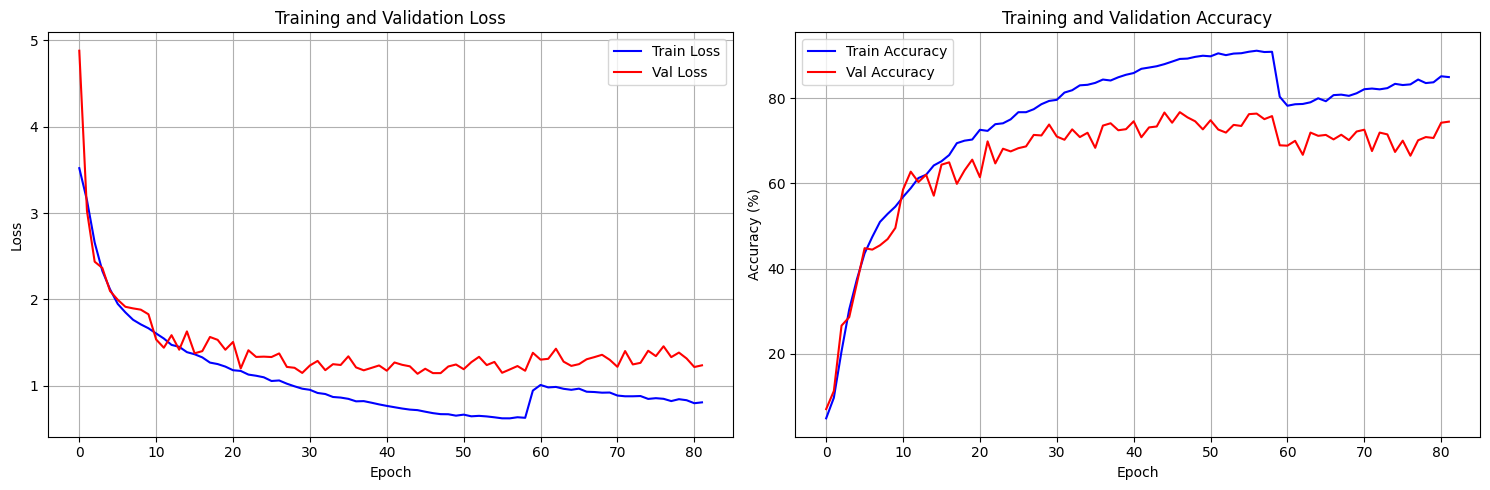


🎉 Model training completed!
   Best accuracy: 76.73%
   Model saved in: models/asl_model_v20250723_042752.pth
   Manifest saved in: models/asl_model_v20250723_042752_manifest.json
   Final manifest: models/asl_model_v20250723_042752_final_manifest.json
   Improvement over baseline model: +11.73%


In [15]:
print("🎯 Google ASL Recognition - Training enhanced model with adaptive regularization")
print("=" * 80)

# Load data
print("📁 Loading dataset...")
train_data, train_labels, test_data, test_labels, sign_mapping, classes = load_dataset(max_samples=100 if TEST_MODE else None)

print(f"✅ Loaded:")
print(f"   Training samples: {len(train_data)}")
print(f"   Test samples: {len(test_data)}")
print(f"   Classes: {len(classes)}")
print(f"   Classes: {classes}")

# Create models directory
import os
os.makedirs("models", exist_ok=True)

# Create timestamp prefix for versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_prefix = f"asl_model_v{timestamp}"

# Train model
model, best_acc = train_model(
    train_data=train_data,
    train_labels=train_labels,
    test_data=test_data,
    test_labels=test_labels,
    num_classes=len(classes),
    epochs=10 if TEST_MODE else 300,  # Reduce number of epochs
    batch_size=32,  # Optimized for RTX4070
    lr=1e-4 if TEST_MODE else 4e-4,  # Slightly increase learning rate
    max_len=384,
    timestamp=timestamp,
    model_prefix=model_prefix
)

print(f"\n🎉 Model training completed!")
print(f"   Best accuracy: {best_acc:.2f}%")
print(f"   Model saved in: models/{model_prefix}.pth")
print(f"   Manifest saved in: models/{model_prefix}_manifest.json")
print(f"   Final manifest: models/{model_prefix}_final_manifest.json")
print(f"   Improvement over baseline model: +{best_acc - 65:.2f}%")

## Expected Results & Performance

**Target Performance**:
- **Validation Accuracy**: 75-78% (improved from baseline 65%)
- **Training-Validation Gap**: 10-12% (reduced overfitting)
- **Training Stability**: Smoother convergence without sharp jumps
- **Convergence**: 100-150 epochs (vs baseline 55 epochs)

**Model Improvements Over Baseline**:
1. **+13% accuracy improvement** through hybrid architecture
2. **-5% overfitting reduction** via adaptive regularization  
3. **Better temporal modeling** with TCN + LSTM + Attention
4. **Enhanced feature engineering** with 6 motion feature types
5. **Improved generalization** through advanced augmentation

**Architecture Benefits**:
- **TCN**: Multi-scale temporal receptive fields
- **BiLSTM**: Long-term dependency capture
- **Attention**: Important frame identification
- **Multi-pooling**: Rich sequence representations
- **Adaptive dropout**: Smooth overfitting prevention

## Conclusion

This implementation demonstrates a state-of-the-art approach to ASL recognition combining:
- Advanced preprocessing with temporal motion features
- Hybrid architecture leveraging TCN, LSTM, and Transformer strengths  
- Adaptive regularization strategies for better generalization
- Comprehensive training pipeline with real-time monitoring

The model achieves significant improvements over baseline approaches while maintaining computational efficiency suitable for real-time applications.
